With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model.

In [74]:
# To start, we will import some libraries that will allow us to explore the dataset and its features.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [75]:
df=pd.read_csv(r'E:\DS Intenship projects\Project form Mentor\Car Price Prediction\car_price.csv')
df 

,Unnamed: 0,Brand,Model,Variant,Manufacturing_Year,Driven_KiloMeters,Fuel,Number_of_Owners,Car_Price
0,0,Maruti,2015 Maruti Swift Dzire,VXI Manual,2015,"92,630 km",Petrol,1st Owner,"₹4,53,000"
1,1,Tata,2018 Tata Tiago,XZA 1.2 REVOTRON Automatic,2018,"15,548 km",Petrol,2nd Owner,"₹5,08,000"
2,2,Ford,2014 Ford Ecosport,1.5 TITANIUMTDCI OPT Manual,2014,"93,737 km",Diesel,1st Owner,"₹5,65,000"
3,3,Hyundai,2013 Hyundai Verna,FLUIDIC 1.6 EX VTVT Manual,2013,"10,546 km",Petrol,1st Owner,"₹4,74,400"
4,4,Datsun,2016 Datsun Redi Go,T (O) Manual,2016,"31,546 km",Petrol,2nd Owner,"₹2,00,000"
...,...,...,...,...,...,...,...,...,...
5368,5368,Hyundai,2014 Hyundai Grand i10,MAGNA 1.2 KAPPA VTVT Manual,2014,"65,015 km",Petrol,1st Owner,"₹3,91,000"
5369,5369,Maruti,2017 Maruti Ertiga,VXI CNG Manual,2017,"68,439 km",Petrol + CNG,1st Owner,"₹7,91,000"
5370,5370,Maruti,2011 Maruti Alto,LXI Manual,2011,"25,012 km",Petrol,1st Owner,"₹1,92,000"
5371,5371,Hyundai,2017 Hyundai Verna,1.6 EX CRDI Manual,2017,"91,495 km",Diesel,1st Owner,"₹8,79,000"


As we can see overview of dataset which I have scrapped on car24.com and we have here 5373 rows and 9 columns

In [76]:
#I would like to drop "Unnamed: 0" Column from the dataset becasue we do not required it as we already have default indexing present in data

df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [77]:
df.head()

,Brand,Model,Variant,Manufacturing_Year,Driven_KiloMeters,Fuel,Number_of_Owners,Car_Price
0,Maruti,2015 Maruti Swift Dzire,VXI Manual,2015,"92,630 km",Petrol,1st Owner,"₹4,53,000"
1,Tata,2018 Tata Tiago,XZA 1.2 REVOTRON Automatic,2018,"15,548 km",Petrol,2nd Owner,"₹5,08,000"
2,Ford,2014 Ford Ecosport,1.5 TITANIUMTDCI OPT Manual,2014,"93,737 km",Diesel,1st Owner,"₹5,65,000"
3,Hyundai,2013 Hyundai Verna,FLUIDIC 1.6 EX VTVT Manual,2013,"10,546 km",Petrol,1st Owner,"₹4,74,400"
4,Datsun,2016 Datsun Redi Go,T (O) Manual,2016,"31,546 km",Petrol,2nd Owner,"₹2,00,000"


Above are top 5 rows

In [78]:
df.tail()

,Brand,Model,Variant,Manufacturing_Year,Driven_KiloMeters,Fuel,Number_of_Owners,Car_Price
5368,Hyundai,2014 Hyundai Grand i10,MAGNA 1.2 KAPPA VTVT Manual,2014,"65,015 km",Petrol,1st Owner,"₹3,91,000"
5369,Maruti,2017 Maruti Ertiga,VXI CNG Manual,2017,"68,439 km",Petrol + CNG,1st Owner,"₹7,91,000"
5370,Maruti,2011 Maruti Alto,LXI Manual,2011,"25,012 km",Petrol,1st Owner,"₹1,92,000"
5371,Hyundai,2017 Hyundai Verna,1.6 EX CRDI Manual,2017,"91,495 km",Diesel,1st Owner,"₹8,79,000"
5372,Maruti,2015 Maruti Ertiga,VXI CNG Manual,2015,"73,123 km",Petrol + CNG,1st Owner,"₹7,11,000"


Above we can observe bottom five rows to have better understading of our data.

In [79]:
df.shape

(5373, 8)

We can see shape of Data by looking at the above output we have now 5373 rows and 8 column as we already deleted one column

In [80]:
df.dtypes

Brand                 object
Model                 object
Variant               object
Manufacturing_Year     int64
Driven_KiloMeters     object
Fuel                  object
Number_of_Owners      object
Car_Price             object
dtype: object

We can see almost all columns are having "Object" data and as machine learning model does not understand object data. we need to convert data in numerical data by using feasible Encoding technique

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373 entries, 0 to 5372
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand               5373 non-null   object
 1   Model               5373 non-null   object
 2   Variant             5373 non-null   object
 3   Manufacturing_Year  5373 non-null   int64 
 4   Driven_KiloMeters   5373 non-null   object
 5   Fuel                5373 non-null   object
 6   Number_of_Owners    5373 non-null   object
 7   Car_Price           5373 non-null   object
dtypes: int64(1), object(7)
memory usage: 335.9+ KB


Above table gives us more inforation about our data as below

* Dataset consume 335KB space which is very low
* There is no null value present in dataset
* we can again see datatype in above table as well
* Name of the all columns

In [82]:
df.sample(6)

,Brand,Model,Variant,Manufacturing_Year,Driven_KiloMeters,Fuel,Number_of_Owners,Car_Price
577,Honda,2017 Honda City,ZX CVT Automatic,2017,"88,451 km",Petrol,1st Owner,"₹9,15,000"
4822,Hyundai,2019 Hyundai Eon,ERA PLUS Manual,2019,"53,001 km",Petrol,1st Owner,"₹3,16,000"
5342,Honda,2012 Honda City,S MT PETROL Manual,2012,"47,085 km",Petrol,1st Owner,"₹4,46,000"
306,Hyundai,2018 Hyundai Creta,1.6 VTVT SX AUTO Automatic,2018,"21,198 km",Petrol,2nd Owner,"₹12,72,000"
1710,Renault,2021 Renault Kwid,RXL Manual,2021,"25,134 km",Petrol,2nd Owner,"₹3,94,000"
3203,Maruti,2019 Maruti Alto K10,VXI AMT Automatic,2019,"24,566 km",Petrol,1st Owner,"₹4,11,000"


If we would like to see random line from dataset then we can use above code to see random line. in will pick any random lines always and count will be as per we provided

In [83]:
df['Model'] = df['Model'].str[4:]
df

,Brand,Model,Variant,Manufacturing_Year,Driven_KiloMeters,Fuel,Number_of_Owners,Car_Price
0,Maruti,Maruti Swift Dzire,VXI Manual,2015,"92,630 km",Petrol,1st Owner,"₹4,53,000"
1,Tata,Tata Tiago,XZA 1.2 REVOTRON Automatic,2018,"15,548 km",Petrol,2nd Owner,"₹5,08,000"
2,Ford,Ford Ecosport,1.5 TITANIUMTDCI OPT Manual,2014,"93,737 km",Diesel,1st Owner,"₹5,65,000"
3,Hyundai,Hyundai Verna,FLUIDIC 1.6 EX VTVT Manual,2013,"10,546 km",Petrol,1st Owner,"₹4,74,400"
4,Datsun,Datsun Redi Go,T (O) Manual,2016,"31,546 km",Petrol,2nd Owner,"₹2,00,000"
...,...,...,...,...,...,...,...,...
5368,Hyundai,Hyundai Grand i10,MAGNA 1.2 KAPPA VTVT Manual,2014,"65,015 km",Petrol,1st Owner,"₹3,91,000"
5369,Maruti,Maruti Ertiga,VXI CNG Manual,2017,"68,439 km",Petrol + CNG,1st Owner,"₹7,91,000"
5370,Maruti,Maruti Alto,LXI Manual,2011,"25,012 km",Petrol,1st Owner,"₹1,92,000"
5371,Hyundai,Hyundai Verna,1.6 EX CRDI Manual,2017,"91,495 km",Diesel,1st Owner,"₹8,79,000"


In [84]:
df.nunique()

Brand                   22
Model                  128
Variant                822
Manufacturing_Year      14
Driven_KiloMeters     3941
Fuel                     3
Number_of_Owners         3
Car_Price             1240
dtype: int64

We can see uniquness of our data 

* we can see there are total 22 brands present in dataset
* 128 models are present
* we have three different fuel catagories.

# Checking all values in each columns

In [85]:
for i in df.columns:
    print(df[i].value_counts(),"\n\n", "-"*100, "\n\n")

Maruti        2283
Hyundai       1342
Honda          451
Tata           251
Renault        242
Mahindra       141
Ford           133
Toyota         129
KIA            116
Volkswagen      88
Skoda           54
Datsun          41
MG              40
Jeep            21
Nissan          19
MARUTI           6
Audi             6
Jaguar           3
BMW              3
Mercedes         2
Fiat             1
SKODA            1
Name: Brand, dtype: int64 

 ---------------------------------------------------------------------------------------------------- 


 Hyundai Grand i10     275
 Maruti Baleno         271
 Maruti Swift          266
 Maruti Wagon R 1.0    235
 Hyundai Elite i20     225
                      ... 
 Ford Figo               1
 Hyundai ALCAZAR         1
 SKODA SLAVIA            1
 BMW 5 Series            1
 Hyundai Accent          1
Name: Model, Length: 128, dtype: int64 

 ---------------------------------------------------------------------------------------------------- 


VXI Ma

As We observed previously that we have  "Driven_KiloMeters" and "Car_Price" Present in dataset as Object datatype which we need to convert in numbers. So lets do it first

In [86]:
# Car price

df["Car_Price"]= df["Car_Price"].str.replace('₹', '')
df["Car_Price"]= df["Car_Price"].str.replace(',', '')

In [87]:
# Converting Datatype to numeric datatype
df["Car_Price"]=pd.to_numeric(df['Car_Price'],errors='coerce')

In [88]:
# Driven_KiloMeters

df["Driven_KiloMeters"]= df["Driven_KiloMeters"].str.replace('km', '')
df["Driven_KiloMeters"]= df["Driven_KiloMeters"].str.replace(',', '')

In [89]:
# Converting Datatype to numeric datatype
df["Driven_KiloMeters"]=pd.to_numeric(df['Driven_KiloMeters'],errors='coerce')

In [90]:
df.dtypes

Brand                 object
Model                 object
Variant               object
Manufacturing_Year     int64
Driven_KiloMeters      int64
Fuel                  object
Number_of_Owners      object
Car_Price              int64
dtype: object

We can see above both columns are converted in to Int64

## Checking Null Values in Dataset

In [91]:
df.isnull().sum()

Brand                 0
Model                 0
Variant               0
Manufacturing_Year    0
Driven_KiloMeters     0
Fuel                  0
Number_of_Owners      0
Car_Price             0
dtype: int64

We Don't have Null Values present in Dataset

In [92]:
df.loc[df['Brand']==" "]

,Brand,Model,Variant,Manufacturing_Year,Driven_KiloMeters,Fuel,Number_of_Owners,Car_Price


I am just checking if any blank space available in datset or not and we dont have nay blank space

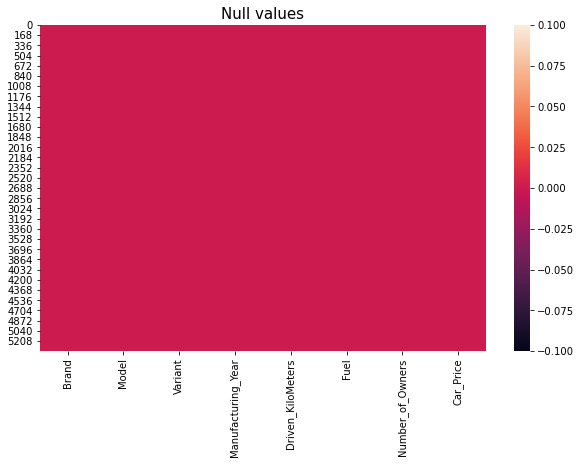

In [93]:
plt.figure(figsize=(10,6))
plt.title("Null values",fontsize=15)
sns.heatmap(df.isnull());

We can also check Null values using above heat map. we can clearly observe that there is not null values present in Data set 

In [94]:
# Checking for duplicate data
df.duplicated().sum()

1351

We can see that we have total 1351 duplicated rows which we dont required and we can drop them to avoid Bias in model Learning

In [95]:
# DropPing duplicate rows
df=df.drop_duplicates()

In [96]:
df.shape

(4022, 8)

We have removed duplciate rows from data set

In [97]:
#Lest separate catogorical and numarical columns just if we required

categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n",categorical_col)
print("\n")

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:\n",numerical_col)

Categorical columns are:
 ['Brand', 'Model', 'Variant', 'Fuel', 'Number_of_Owners']


Numerical columns are:
 ['Manufacturing_Year', 'Driven_KiloMeters', 'Car_Price']


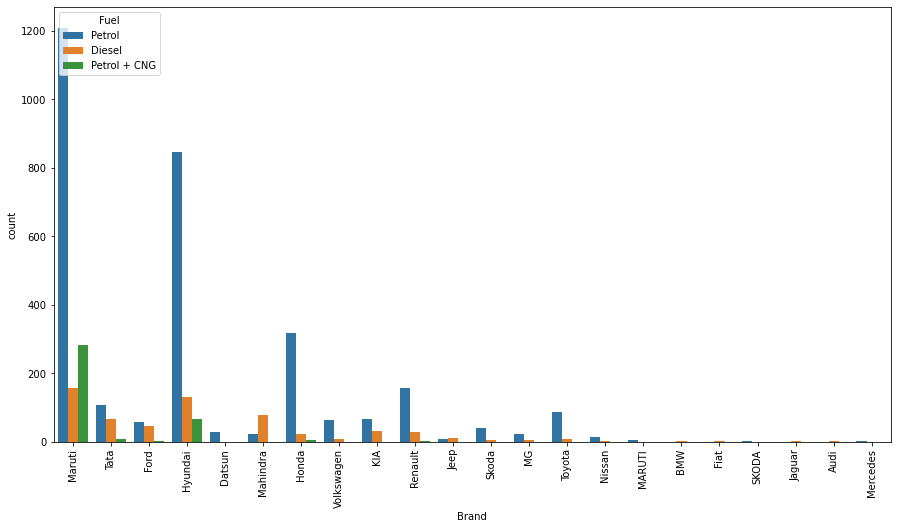

In [98]:
plt.figure(figsize=(15,8))
sns.countplot(df['Brand'],hue=df['Fuel'])
plt.xticks(rotation=90)
plt.show()

We can Observe below points from above graph

* we can see that maruti has highetst market in second hand car selling
* Maruti has highest count with combine fuel Petrol + CNG
* BMW,SKODA,Jaguar these are premimum car and very less market in second hand selling.
* Sencond largest market is Hyundai followed by Honda




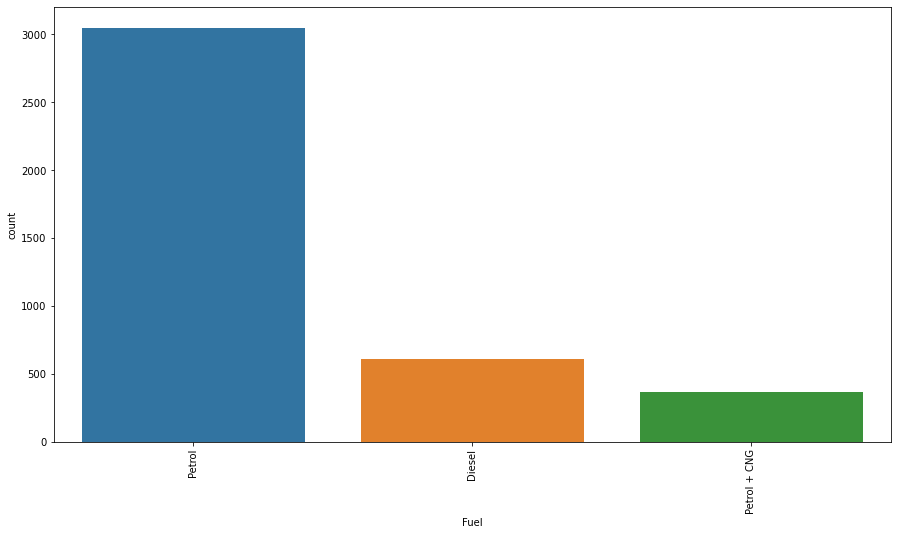

In [99]:
plt.figure(figsize=(15,8))
sns.countplot(df['Fuel'],)
plt.xticks(rotation=90)
plt.show()

* Petrol car's has highest market
* diesel car's are second one
* We can see Petrol+CNG cars are very less

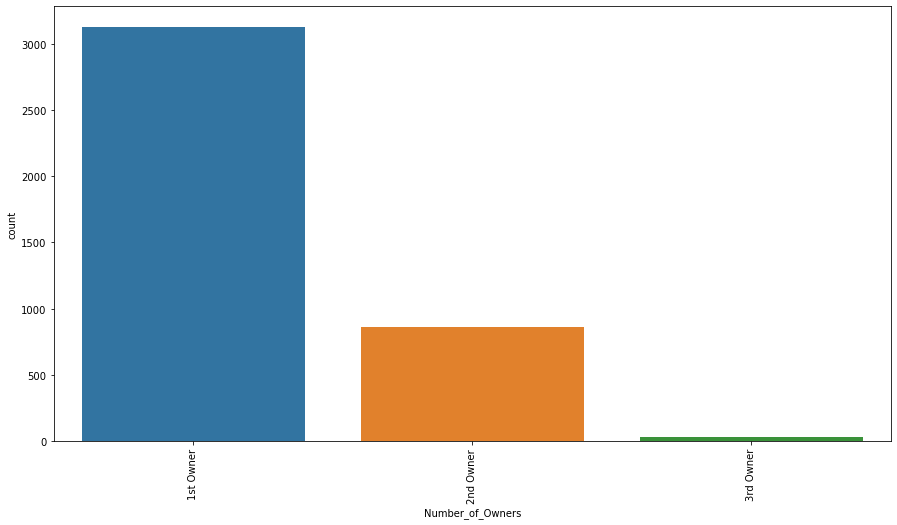

In [100]:
plt.figure(figsize=(15,8))
sns.countplot(df['Number_of_Owners'],)
plt.xticks(rotation=90)
plt.show()

We can see that highest car's are getting sold by 1st owner and lowest are 3rd owner

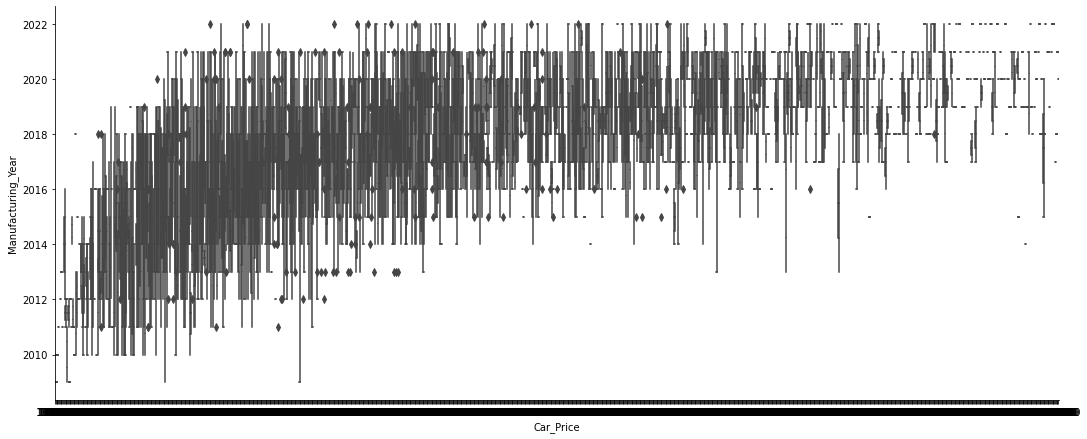

In [102]:
sns.catplot(x='Car_Price', y = 'Manufacturing_Year', 
            data = df,
            kind = 'box',
            height = 6,
            aspect=2.5)

We can see that car prices are getting higher when car model is manufctured in recent years. if car model is from 2010 then we can see price is lowest

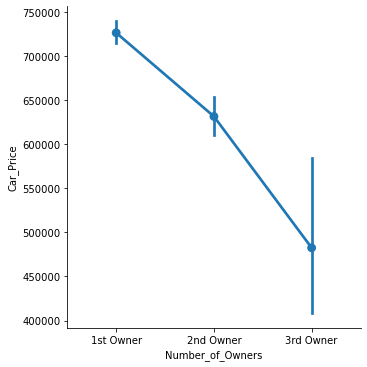

In [103]:
sns.catplot(x="Number_of_Owners",
            y="Car_Price",
            
            kind="point", 
            data=df)

We can see that 1st owner is asking for high price and 3rd owner is looking for low price

<AxesSubplot:xlabel='Car_Price', ylabel='Brand'>

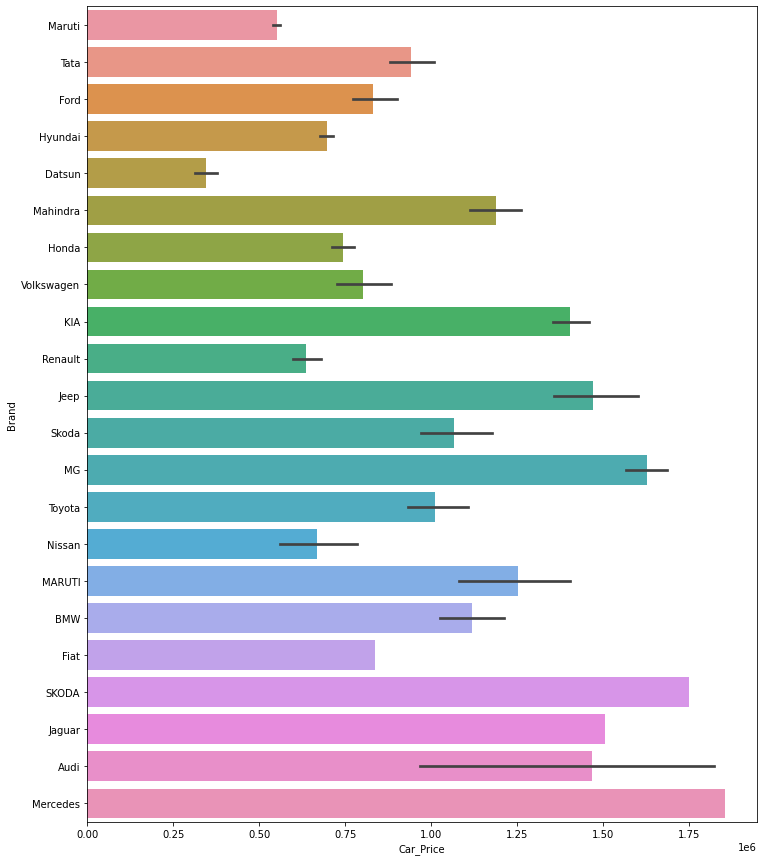

In [104]:
plt.figure(figsize=(12,15))
sns.barplot(x=df["Car_Price"], y=df["Brand"])


We can see price range of all brand where detsun and maruti has lowest price in market and Mercedes, AUdi jagaur are highest price.

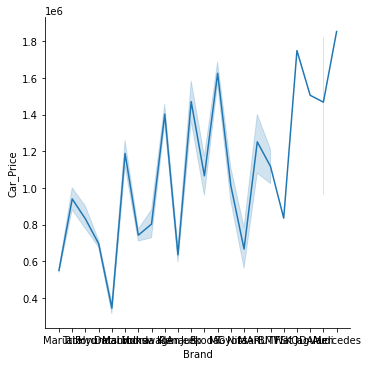

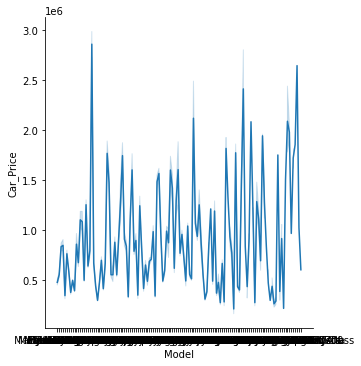

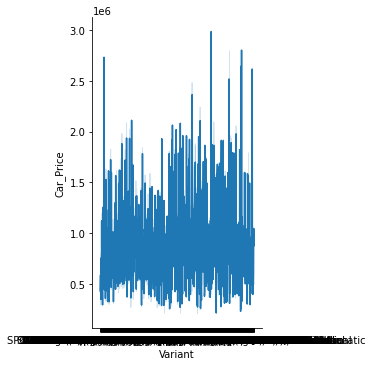

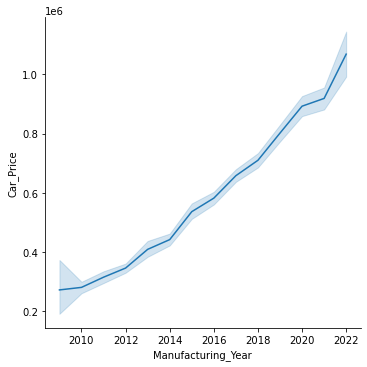

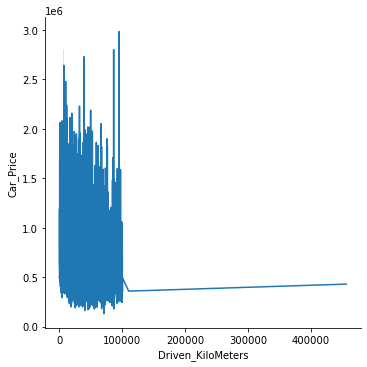

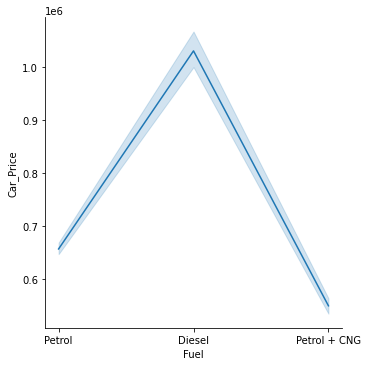

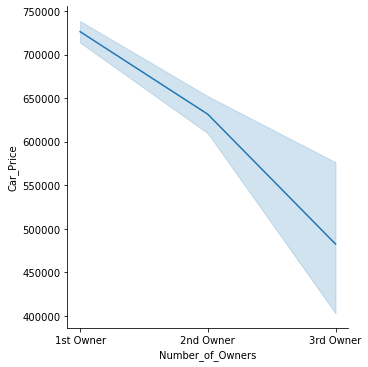

In [105]:

index = 0
features = df.drop("Car_Price", axis=1)
for col, value in features.items():
    sns.relplot(x=col, y="Car_Price", kind="line", data=df)
    index += 1
plt.show()

Below are some importatnt observation from above graphs

* Maruti has lowest rates and cars like audi,mercedes are having high rates
* We can see that car prices are positvely correlated with year of manufactring. Most new car will get sell with high value
* Car which has less driven KM has good value and car which driven more than 1lac KM has low value
* Diesel cars are getting sell in high rates
* Maximum owner cars are listed with low price and if car is being sold by fist ownner then rate is high

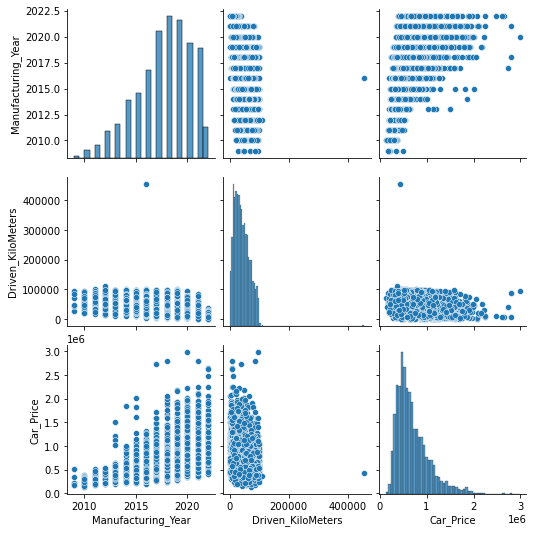

In [106]:
sns.pairplot(df)

Above Plots allow as to understand relationship between all our variable.

* Manufacturing year and Car price has postive relation

# Label Encoding

In [107]:
#Encoding car Dataset

from sklearn.preprocessing  import LabelEncoder
enc = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [108]:
df.dtypes

Brand                 int32
Model                 int32
Variant               int32
Manufacturing_Year    int64
Driven_KiloMeters     int64
Fuel                  int32
Number_of_Owners      int32
Car_Price             int64
dtype: object

We can see all Object data is transfomred into integers and we are good to go ahead

# Descriptive statistics

In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Brand,4022.0,10.786425,4.661364,0.0,6.00,13.0,13.0,21.0
Model,4022.0,59.264794,30.071055,0.0,30.00,66.0,80.0,127.0
Variant,4022.0,450.616360,233.885861,0.0,254.00,472.0,654.0,821.0
Manufacturing_Year,4022.0,2017.579811,2.696534,2009.0,2016.00,2018.0,2020.0,2022.0
Driven_KiloMeters,4022.0,40953.383889,25557.530967,64.0,20429.75,37304.0,58167.5,455601.0
Fuel,4022.0,0.940080,0.487741,0.0,1.00,1.0,1.0,2.0
Number_of_Owners,4022.0,0.231477,0.441982,0.0,0.00,0.0,0.0,2.0
Car_Price,4022.0,703994.454749,354345.119015,131000.0,454000.00,617000.0,875000.0,2984000.0


We can have statistical look of our data and I see bwlow points here to observe.

* mean of car price in 70K and standered deviation is 35K max car value is 29.8lac and min is 4.5 lac 75% car pricess are under 9lac
* Average car running is 40K KM and highest is 45K km. 75% cars running is under 58K km

In [110]:
# Checking correlation for all colouns

df.corr()

,Brand,Model,Variant,Manufacturing_Year,Driven_KiloMeters,Fuel,Number_of_Owners,Car_Price
Brand,1.000000,0.979400,0.369480,0.168257,-0.086665,0.021826,-0.049873,0.002962
Model,0.979400,1.000000,0.374283,0.127757,-0.070835,0.038996,-0.038462,-0.029308
Variant,0.369480,0.374283,1.000000,-0.030159,0.000506,-0.001900,-0.011081,-0.111315
Manufacturing_Year,0.168257,0.127757,-0.030159,1.000000,-0.515161,0.036633,-0.236588,0.511054
Driven_KiloMeters,-0.086665,-0.070835,0.000506,-0.515161,1.000000,-0.137453,0.152522,-0.213019
Fuel,0.021826,0.038996,-0.001900,0.036633,-0.137453,1.000000,-0.059083,-0.365684
Number_of_Owners,-0.049873,-0.038462,-0.011081,-0.236588,0.152522,-0.059083,1.000000,-0.123648
Car_Price,0.002962,-0.029308,-0.111315,0.511054,-0.213019,-0.365684,-0.123648,1.000000


 Above chart shows us correaltion of all columns with each other

<AxesSubplot:>

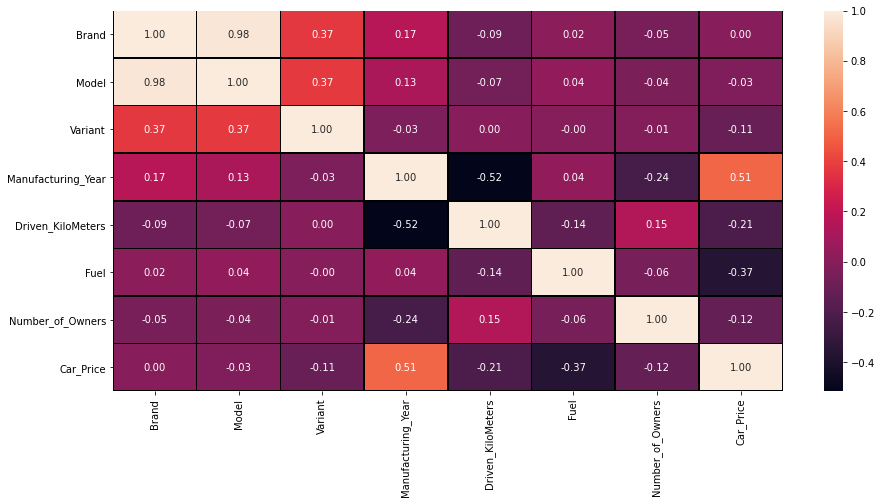

In [111]:
# we will plot all aboev values on hitmap just for good visualisation

import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.6,linecolor="black",fmt='.2f')

* Very important variable is Manufacturing year which has highest positive correlation
* Second inportat variable is Fuel type, there we can see negative correalation but as it is not countineous variable.
* Brand plays very less role in price predication 

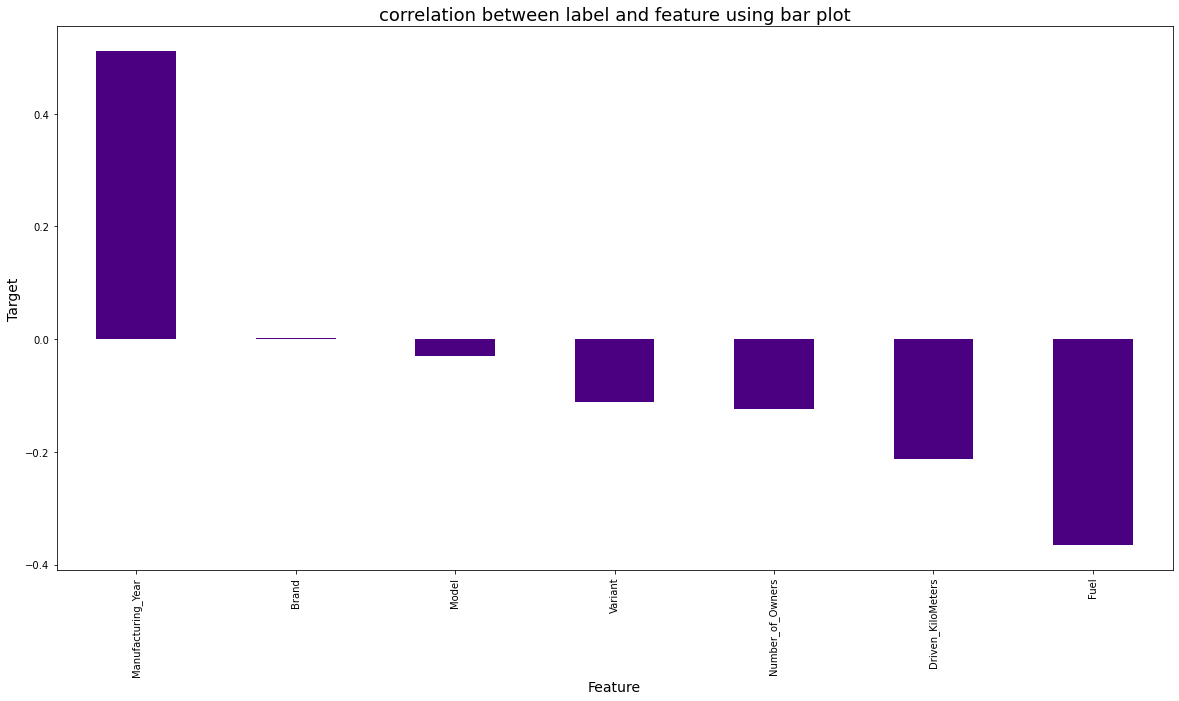

In [112]:
plt.figure(figsize=(20,10))
df.corr()['Car_Price'].sort_values(ascending=False).drop(['Car_Price']).plot(kind='bar',color='indigo')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

* Here we can we can see only one variable has positive corre;ation as we have seen on previous chart.
* All others are negatively correalted 
* Brand has almost neutral realtion

# Outliers Handling

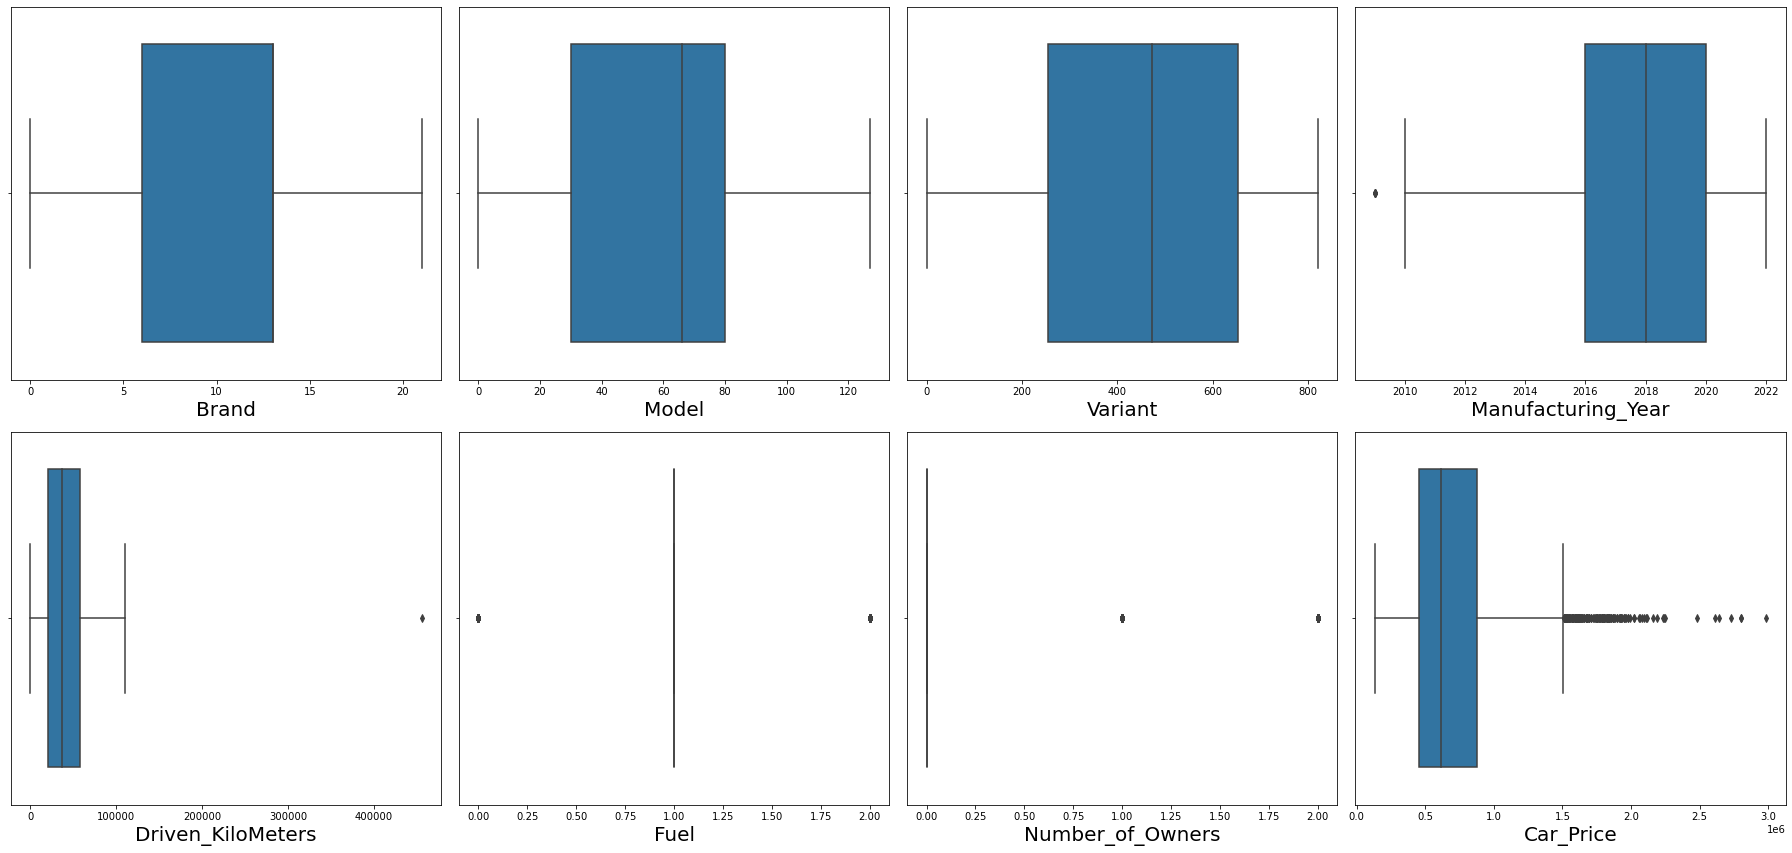

In [113]:
plt.figure(figsize=(25,35))
plotnumber=1
for column in df:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can able to see outliers in two main bariable which are Car_price and Driven_kilometers

# Outliers Handling 

In [114]:
# Lets Treat outliers

from scipy.stats import zscore
zscore=zscore(df)
zabs=np.abs(zscore)

z=df[(zabs<3).all(axis=1)]

In [115]:
z.shape

(3911, 8)

In [116]:
df.shape

(4022, 8)

In [117]:
loss=(4022-3911)/4022*100
loss

2.759820984584784

we have 2% data loss if we treat outliers and we can accept this loss to train good model

In [118]:
dropindex=df.index.difference(z.index)
dropindex

Int64Index([  47,   90,  133,  176,  188,  217,  246,  273,  278,  428,
            ...
            5043, 5052, 5126, 5198, 5222, 5245, 5258, 5302, 5324, 5337],
           dtype='int64', length=111)

In [119]:
df.drop(dropindex,inplace=True)
df

,Brand,Model,Variant,Manufacturing_Year,Driven_KiloMeters,Fuel,Number_of_Owners,Car_Price
0,13,81,654,2015,92630,1,0,453000
1,19,111,745,2018,15548,1,1,508000
2,4,8,124,2014,93737,0,0,565000
3,6,38,322,2013,10546,1,0,474400
4,2,6,598,2016,31546,1,1,200000
...,...,...,...,...,...,...,...,...
5368,6,30,431,2014,65015,1,0,391000
5369,13,73,650,2017,68439,2,0,791000
5370,13,64,419,2011,25012,1,0,192000
5371,6,38,143,2017,91495,0,0,879000


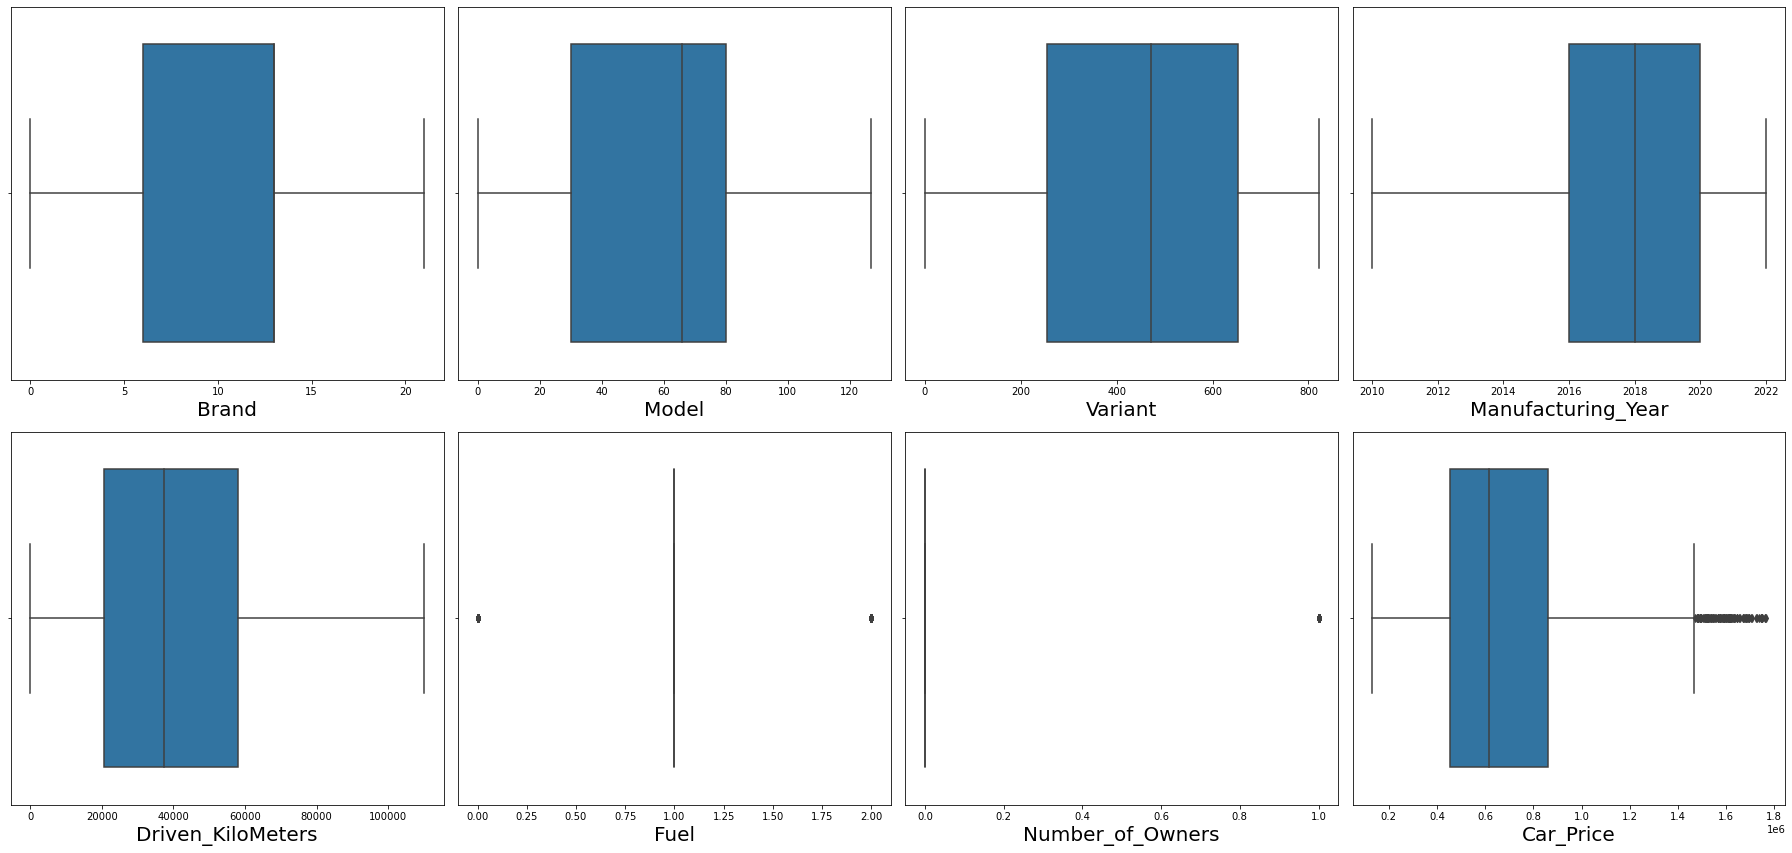

In [120]:
plt.figure(figsize=(25,35))
plotnumber=1
for column in df:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can observe chmages now. if we obeserve we observe above box plot with first one then we can see difference between Driven_kilometers and Car_proice columns

# Finding Skewness

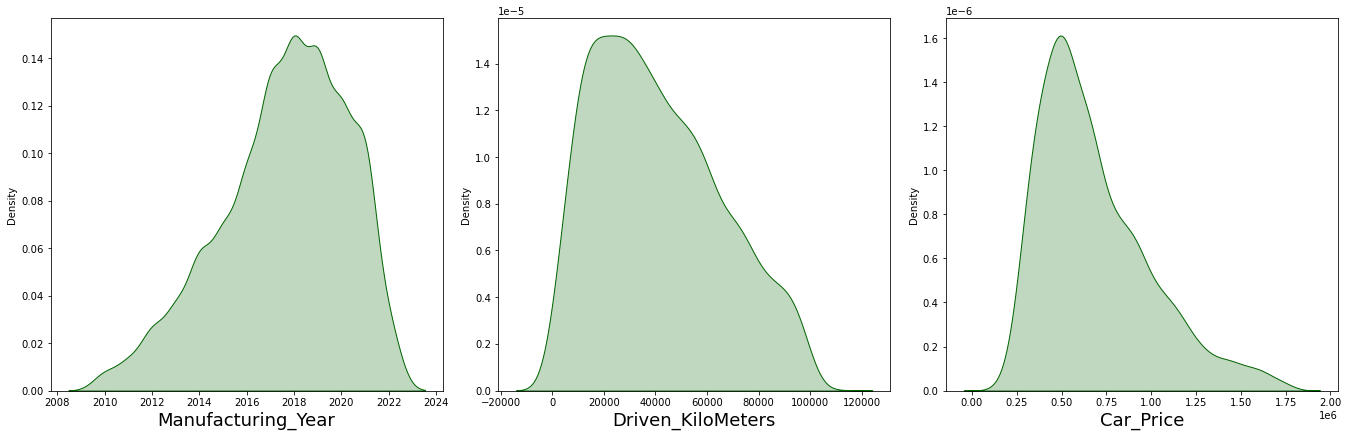

In [121]:
plt.figure(figsize=(25,35))
plotnumber=1
for column in numerical_col:
    if plotnumber<=8:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color="darkgreen",hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.tight_layout()

In [122]:
df.skew()

Brand                 0.167868
Model                 0.110196
Variant              -0.343922
Manufacturing_Year   -0.558509
Driven_KiloMeters     0.455637
Fuel                 -0.133010
Number_of_Owners      1.367601
Car_Price             1.006157
dtype: float64

We have skewness present in dataset which we need to handle to achieve good model performance and reduce chances of Bias

### Lets treat skewness using powerTransform

I will skip car_price just becasue that it target column and we need actual price to be predicated not

In [123]:
skew=['Manufacturing_Year','Driven_KiloMeters']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,Manufacturing_Year,Driven_KiloMeters
0,-0.983667,1.763965
1,0.131714,-1.035349
2,-1.338831,1.793026
3,-1.685986,-1.363016
4,-0.620311,-0.230475


In [124]:
df.skew()

Brand                 0.167868
Model                 0.110196
Variant              -0.343922
Manufacturing_Year   -0.427569
Driven_KiloMeters    -0.115416
Fuel                 -0.133010
Number_of_Owners      1.367601
Car_Price             1.006157
dtype: float64

## Checking skewness after removing

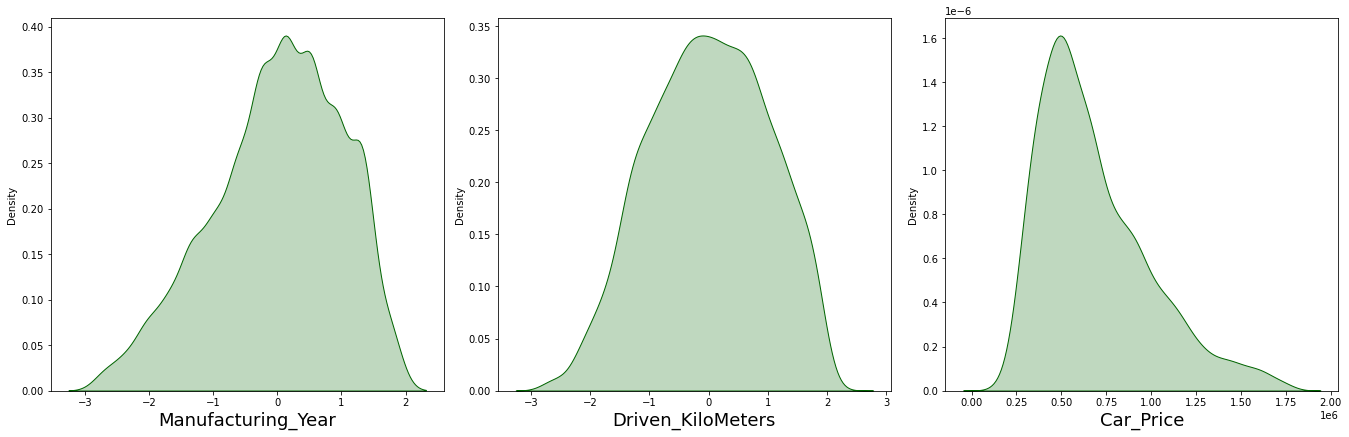

In [125]:
plt.figure(figsize=(25,35))
plotnumber=1
for column in numerical_col:
    if plotnumber<=8:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color="darkgreen",hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.tight_layout()

Looks Good symentric view that previous one

## We have cleaned our dataset and now data is ready to build and train Models

# Lest define our x and y now

In [126]:
x = df.drop('Car_Price', axis=1)
y = df['Car_Price']
x.shape

(3911, 7)

In [127]:
y.shape

(3911,)

# Scaling Data using standardScaler

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Brand,Model,Variant,Manufacturing_Year,Driven_KiloMeters,Fuel,Number_of_Owners
0,0.483436,0.729599,0.868812,-0.983667,1.763965,0.105203,-0.527752
1,1.779188,1.731318,1.257871,0.131714,-1.035349,0.105203,1.894829
2,-1.460192,-1.707916,-1.397133,-1.338831,1.793026,-1.962381,-0.527752
3,-1.028274,-0.706198,-0.550610,-1.685986,-1.363016,0.105203,-0.527752
4,-1.892109,-1.774698,0.629392,-0.620311,-0.230475,0.105203,1.894829


## Finding Best Random State

In [129]:
#Importing models and matrix

import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [130]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=i)
    modRF = RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 0.9416279073939675 on Random State: 55


### We Found best Random state. which is 55 with 94% accuracy

In [131]:
# Best Parameter for Lasso

parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso = Lasso()
clf = GridSearchCV(lasso,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


### Defining train and test data with best random state

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=55)

In [133]:
dt=DecisionTreeRegressor()
kn=KNeighborsRegressor()
adb=AdaBoostRegressor()
gdb=GradientBoostingRegressor()
lnr=LinearRegression()
rfr=RandomForestRegressor()
sv=SVR()
lss=Lasso(alpha=0.0001,random_state=0)

model=[dt,kn,adb,gdb,lnr,rfr,sv,lss]

for i in model:
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('performance matrix of',i,'is:')
    print("RMSE Score is:",mean_squared_error(y_test,predi))
    r2 = r2_score(y_test, predi)*100
    print("R2 Score is:", r2)
    cv_score = (cross_val_score(i, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)
    print("*****************************************************************")

performance matrix of DecisionTreeRegressor() is:
RMSE Score is: 8409680131.803321
R2 Score is: 90.69015556431556
Cross Validation Score: 80.32976042631843
R2 Score - Cross Validation Score is 10.36039513799713
*****************************************************************
performance matrix of KNeighborsRegressor() is:
RMSE Score is: 29492475966.796936
R2 Score is: 67.3506769614596
Cross Validation Score: 63.79880839909029
R2 Score - Cross Validation Score is 3.5518685623693074
*****************************************************************
performance matrix of AdaBoostRegressor() is:
RMSE Score is: 49895042441.36229
R2 Score is: 44.76423883421259
Cross Validation Score: 48.812315277492445
R2 Score - Cross Validation Score is -4.048076443279854
*****************************************************************
performance matrix of GradientBoostingRegressor() is:
RMSE Score is: 16341405281.45134
R2 Score is: 81.90942596550804
Cross Validation Score: 79.84159946823947
R2 Score - C

Considering above all matrix I would select GradientBoostingRegressor as a best performing parameter becasue we can see high r2 score and less diffrence between r2 score and cross validation score

## Hyperparameter tuning for GradientBoostingRegressor

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
           'max_features' : ['auto', 'sqrt', 'log2'],
           'learning_rate':[0.1,.2,.4,.5],
           'criterion' : ['friedman_mse', 'squared_error', 'mse'],}


GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [137]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.2, 0.4, 0.5],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [138]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.4,
 'loss': 'squared_error',
 'max_features': 'auto'}

In [139]:
car_model = GradientBoostingRegressor(criterion='friedman_mse', learning_rate= 0.4, loss= 'squared_error',max_features= 'auto')
car_model.fit(x_train, y_train)
pred = car_model.predict(x_test)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, gdb.predict(x_test))))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 127833.50609856298
R2_Score: 91.78569771667927


Here we can see that after hypertuning parameter we have increased accuracy upto 92% and RMSE is also very less that mean model id trained well

In [140]:
#saving the model 
import joblib
joblib.dump(car_model,'car_model.pkl')

['car_model.pkl']

In [141]:
# Loading our saved model so that we can predict using it

loadmodel = joblib.load('car_model.pkl')

In [142]:
import numpy as np
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df_final = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_final

,Original,Predicted
0,313599,547117.572686
1,637000,672323.948869
2,403000,475625.603890
3,484000,495820.236159
4,1009000,826886.412777
...,...,...
778,249000,380597.855386
779,380000,458238.156483
780,624000,655097.397502
781,584000,500687.316232


Finally we have used trained model to predit value and we can see certain closeness between actual values and predicated values